# GET DATA

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
import pathlib

data_root = pathlib.Path('../data/butterfly_dataset').with_suffix('')


batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_root),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

train_ds = train_ds.unbatch()
images = list(train_ds.map(lambda x, y: x))
labels = list(train_ds.map(lambda x, y: y))


Found 3471 files belonging to 9 classes.
Using 2777 files for training.


# Custom data augmentation

This section of the tutorial shows two ways of doing so:

First, you will create a tf.keras.layers.Lambda layer. This is a good way to write concise code.
Next, you will write a new layer via subclassing, which gives you more control.
Both layers will randomly invert the colors in an image, according to some probability.

In [260]:
def random_invert_img(x, p=0.5):

  seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.GaussianBlur(sigma=(0, 3.0))
  ])
  
  res = []
  for i in x:
    nump = i.numpy()
    r = seq(images=nump)
    res.append(tf.convert_to_tensor(r, dtype=np.uint8))
  return res



In [261]:

def random_invert():
  return layers.Lambda(lambda x: random_invert_img(x))

random_invert = random_invert()



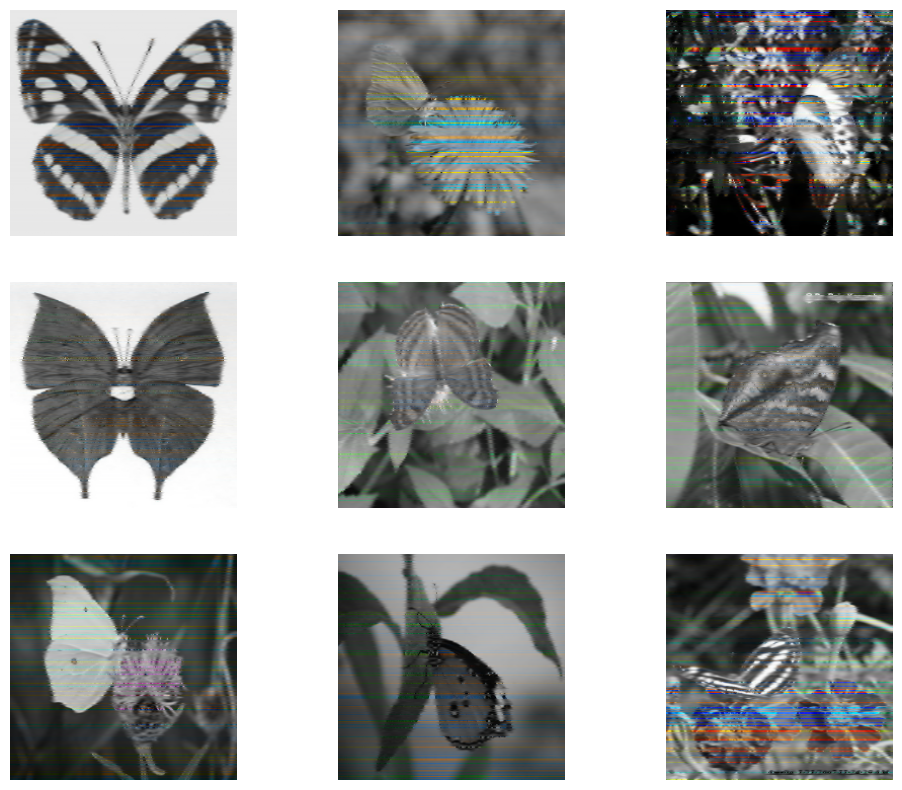

In [262]:
plt.figure(figsize=(12, 10))
for i in range(9):
  augmented_image = random_invert(images[:9])
  ax = plt.subplot(3, 3, i + 1)
  #print(augmented_image)

  plt.imshow(augmented_image[i]/255)
  plt.axis("off")

Next, implement a custom layer by subclassing:

https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

In [263]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

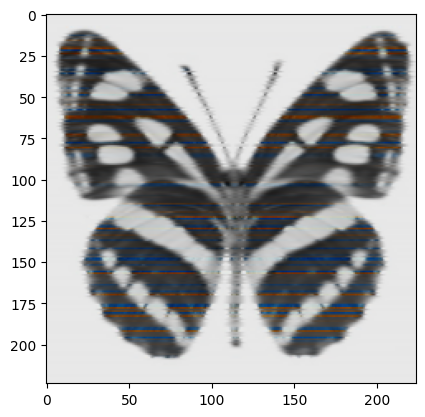

In [265]:
_ = plt.imshow(RandomInvert()(images[0]))


Both of these layers can be used as described in options 1 and 2 below.



In [ ]:
# Option 1: Make the preprocessing layers part of your model

model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])

In [ ]:
# Option 2: Apply the preprocessing layers to your dataset

aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

For more infos, checke here: https://www.tensorflow.org/tutorials/images/data_augmentation